1\. **Pandas DataFrame**

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a pair of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every `x` BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [ ]:
# If haven't downloaded it yet, please get the data file with wget
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ./data/

1\. Create a Pandas DataFrame reading N rows of the `data/data_000637.txt` dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k (check the documentation).

In [1]:
import pandas as pd
import numpy as np

N = np.random.randint(10000,len(pd.read_csv("data/data_000637.txt")))
data = pd.read_csv("data/data_000637.txt",nrows=N)

print(len(data))

746247


2\. Estimate the number of BX in a ORBIT (the value `x`).

*Hint*: check when the BX counter reaches the maximum value before being reset to 0.

In [2]:
print(type(data))
import matplotlib.pyplot as plt

# data["BX_COUNTER"]
ORBITS = list(set(data["ORBIT_CNT"].values)) 
print("Number of BX in a random ORBIT \n",len(data[data['ORBIT_CNT']==np.random.choice(ORBITS)]['BX_COUNTER']))


<class 'pandas.core.frame.DataFrame'>
Number of BX in a random ORBIT 
 82


3\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information) since the beginning of the data acquisition, and convert the new column to a Time Series.

In [4]:
def time(orb,bx,tdc,max):
    return  (orb*max*25)+ (bx*25) + ((25/30)*tdc)
max_BX = -1
data['ABS_TIME'] = time(data['ORBIT_CNT'], data['BX_COUNTER'], data['TDC_MEAS'],max_BX)
data['ABS_TIME_SERIES'] = pd.to_datetime(data['ABS_TIME'])
print(data)


        HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS  \
0          1     0          123  3869200167        2374        26   
1          1     0          124  3869200167        2374        27   
2          1     0           63  3869200167        2553        28   
3          1     0           64  3869200167        2558        19   
4          1     0           64  3869200167        2760        25   
...      ...   ...          ...         ...         ...       ...   
746242     1     0           48  3869207324        2282        20   
746243     1     1           22  3869207324        2288        27   
746244     1     0           64  3869207324        2283        11   
746245     1     1            3  3869207324        2284         5   
746246     1     0           44  3869207324        2281        24   

            ABS_TIME               ABS_TIME_SERIES  
0      -9.672994e+10 1969-12-31 23:58:23.270055197  
1      -9.672994e+10 1969-12-31 23:58:23.270055198  
2      -9.67

4\. Find out the duration of the data taking in hours, minutes and seconds, by using the features of the Time Series. Perform this check reading the whole dataset.

In [5]:
print(data['ABS_TIME_SERIES'][len(data)-1] - data['ABS_TIME_SERIES'][0])

-1 days +23:59:59.999818748


5\. Use the `.groupby()` method to find out the noisy channels, i.e. the TDC channels with most counts (print to screen the top 3 and the corresponding counts)

In [6]:
noisy = data.groupby('TDC_CHANNEL').size().sort_values(ascending=False)
noisy.iloc[:3]

TDC_CHANNEL
139    61836
64     37396
63     36768
dtype: int64

6\. Count the number of non-empty orbits (i.e. the number of orbits with at least one hit).

In [7]:
col = data.groupby(['ORBIT_CNT']).count()
print(len(col))

7154


7\. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139.

In [8]:
print(len(list(set(data[data['TDC_CHANNEL']==139]['ORBIT_CNT']))))

7129


8\. Create two Series (one for each FPGA) that have the TDC channel as index, and the number of counts for the corresponding TDC channel as values.

In [9]:
FPGA_0 = data[data['FPGA']==0]
FPGA_1 = data[data['FPGA']==1]
print("FPGA_0 :",pd.Series(FPGA_0.groupby('TDC_CHANNEL').size()))
print("FPGA_1 :",pd.Series(FPGA_1.groupby('TDC_CHANNEL').size()))

FPGA_0 : TDC_CHANNEL
1        696
2        886
3        867
4       1331
5        819
       ...  
129        2
130       18
137       17
138       18
139    43335
Length: 124, dtype: int64
FPGA_1 : TDC_CHANNEL
1      16119
2      18503
3      12487
4      14942
5       8455
       ...  
129       19
130       22
137       20
138       20
139    18501
Length: 132, dtype: int64


9\. **Optional:** Create two histograms (one for each FPGA) that show the number of counts for each TDC channel.

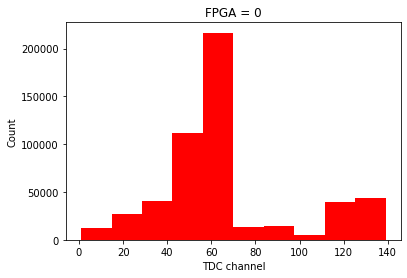

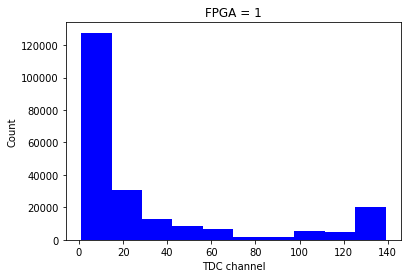

In [10]:
histogram_0 = FPGA_0.hist(column = 'TDC_CHANNEL', grid = False, color = 'red')
plt.title('FPGA = 0')
plt.xlabel('TDC channel')
plt.ylabel('Count')
histogram_1 = FPGA_1.hist(column = 'TDC_CHANNEL', grid = False, color = 'blue')
plt.title('FPGA = 1')
plt.xlabel('TDC channel')
plt.ylabel('Count')
plt.show()
